In [3]:
import pandas as pd
questions = pd.read_csv('Questions.csv', encoding = 'Latin')

In [174]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Text
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,I've written a database generation script in S...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Are there any really good tutorials explaining...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Has anyone got experience creating SQL-based ...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,This is something I've pseudo-solved many time...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,I have a little game written in C#. It uses a ...


In [ ]:
answers = pd.read_csv('Answers.csv', encoding = 'Latin')

In [175]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [177]:
#quantity
count_qn = questions.OwnerUserId.value_counts()

In [178]:
import seaborn as sb, numpy as np

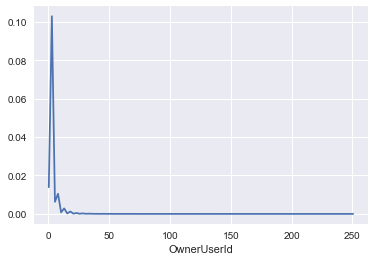

In [179]:
%matplotlib inline
sb.distplot(count_qn, hist = False)

In [182]:
#Group by user ID for further analysis
grouped_qn = questions.groupby("OwnerUserId")["Score"]

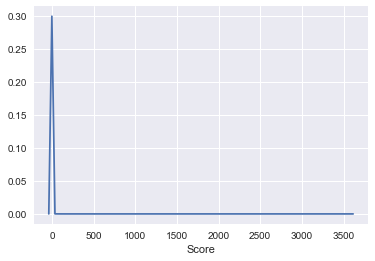

In [183]:
#average quality
avgscore_qn = grouped_qn.mean()
%matplotlib inline
sb.distplot(avgscore_qn, hist = False)

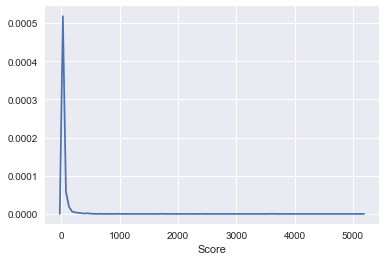

In [184]:
#highest quality
maxscore_qn = grouped_qn.max()
%matplotlib inline
sb.distplot(maxscore_qn, hist = False)

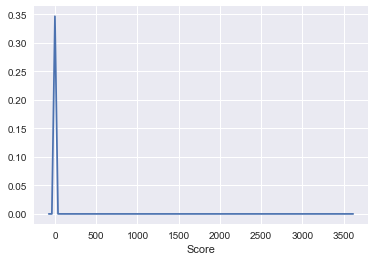

In [185]:
#worst quality
minscore_qn = grouped_qn.min()
%matplotlib inline
sb.distplot(minscore_qn, hist = False)

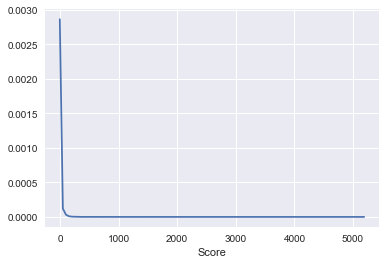

In [186]:
#largest difference in quality
diffscore_qn = maxscore_qn - minscore_qn
%matplotlib inline
sb.distplot(diffscore_qn, hist = False)

In [190]:
data_qn = pd.DataFrame({"Diff_Qns": diffscore_qn, 
        "MaxScore_Qns": maxscore_qn, 
        "MinScore_Qns": minscore_qn, 
        "AvgScore_Qns": avgscore_qn, 
        "Count_Qns": count_qn})
data_df.head()

,AvgScore_Qns,Count_Qns,Diff_Qns,MaxScore_Qns,MinScore_Qns
OwnerUserId,,,,,
1.0,19.333333,3,18,28,10
4.0,26.333333,3,62,66,4
5.0,6.250000,4,12,12,0
9.0,2.000000,1,0,2,2
17.0,5.000000,3,14,14,0


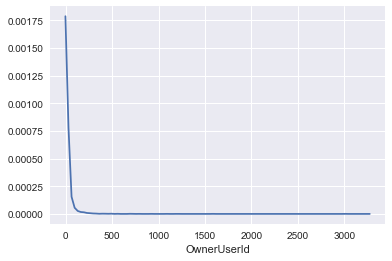

In [191]:
#quantity
count_ans = answers.OwnerUserId.value_counts()
%matplotlib inline
sb.distplot(count_ans, hist = False)

In [193]:
#Group by user ID for further analysis
grouped_ans = answers.groupby("OwnerUserId")["Score"]

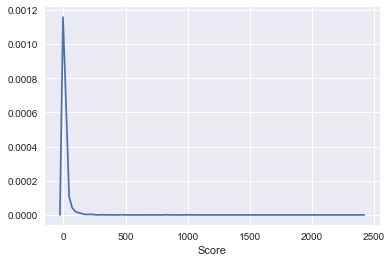

In [197]:
#average quality
avgscore_ans = grouped_ans.mean()
%matplotlib inline
sb.distplot(avgscore_ans, hist = False)

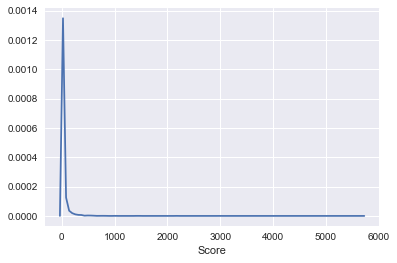

In [198]:
#highest quality
maxscore_ans = grouped_ans.max()
%matplotlib inline
sb.distplot(maxscore_ans, hist = False)

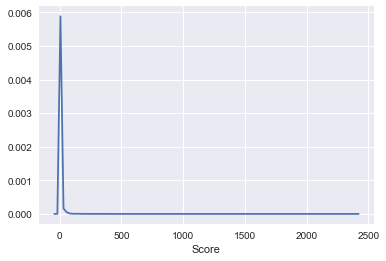

In [199]:
#worst quality
minscore_ans = grouped_ans.min()
%matplotlib inline
sb.distplot(minscore_ans, hist = False)

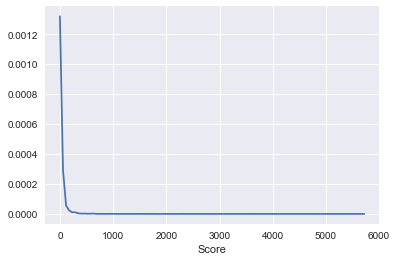

In [200]:
#largest difference in quality
diffscore_ans = maxscore_ans - minscore_ans
%matplotlib inline
sb.distplot(diffscore_ans, hist = False)

In [248]:
data_ans = pd.DataFrame({"Diff_Ans": diffscore_ans, 
        "MaxScore_Ans": maxscore_ans, 
        "MinScore_Ans": minscore_ans, 
        "AvgScore_Ans": avgscore_ans, 
        "Count_Ans": count_ans})
data_ans.head()

,AvgScore_Ans,Count_Ans,Diff_Ans,MaxScore_Ans,MinScore_Ans
OwnerUserId,,,,,
1.0,17.846154,13,77,78,1
3.0,11.833333,6,49,49,0
4.0,2.736842,19,16,16,0
5.0,7.961538,26,65,65,0
9.0,3.500000,6,11,11,0


In [259]:
data = data_ans.join(data_qn, how = "outer")
data.head()

,AvgScore_Ans,Count_Ans,Diff_Ans,MaxScore_Ans,MinScore_Ans,AvgScore_Qns,Count_Qns,Diff_Qns,MaxScore_Qns,MinScore_Qns
OwnerUserId,,,,,,,,,,
1.0,17.846154,13.0,77.0,78.0,1.0,19.333333,3.0,18.0,28.0,10.0
3.0,11.833333,6.0,49.0,49.0,0.0,NaN,NaN,NaN,NaN,NaN
4.0,2.736842,19.0,16.0,16.0,0.0,26.333333,3.0,62.0,66.0,4.0
5.0,7.961538,26.0,65.0,65.0,0.0,6.250000,4.0,12.0,12.0,0.0
9.0,3.500000,6.0,11.0,11.0,0.0,2.000000,1.0,0.0,2.0,2.0


In [260]:
data.to_csv("UserAnalysis.csv")

In [133]:
tags = pd.read_csv("Stack Question Tags.csv", encoding = "Latin")
tags.Tag.value_counts()

javascript                  1540123
java                        1474705
php                         1296218
c#                          1258269
android                     1219858
jquery                       967536
python                       782220
html                         728505
ios                          602047
c++                          594281
mysql                        532420
css                          514016
sql                          414999
asp.net                      387447
objective-c                  330437
ruby-on-rails                312683
.net                         292680
c                            289398
iphone                       271388
angularjs                    244034
arrays                       232010
json                         215101
sql-server                   212924
ruby                         201660
ajax                         197773
r                            193261
linux                        190218
xml                         